## Monitoria 4 - Econometría
### Pontificia Universidad Javeriana
####  Mapa de calor - En proceso

En este documento mostraremos como usar GIS en python. Para empezar graficaremos los casos totales de coronavirus en el mundo para el 20 de mayo del 2021. Luego, graficaremos el puntaje promedio en las pruebas saber 11 por departamento en un mapa de Colombia.

In [28]:
import pandas as pd 
import numpy as np 
import os 

pathout = './data/'
if not os.path.exists(pathout):
    os.mkdir(pathout) 
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs): 
        os.mkdir(pathgraphs) 

In [29]:
from __future__ import division
%pylab --no-import-all
%matplotlib inline
import os, sys
import matplotlib as mpl
import seaborn as sns
# Setup seaborn
sns.set()

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [30]:
# GIS packages para hacer mapas
import geopandas as gpd
from geopandas.tools import overlay
from shapely.geometry import Polygon, Point
import georasters as gr
# Alias for Geopandas
gp = gpd

## 1. Mapa del Mundo - Casos Totales Covid 19 (20 de Mayo 2021)

In [31]:
covid = pd.read_excel(pathout + 'owid-covid-data.xlsx')

In [32]:
countries = gpd.read_file('https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip')

In [33]:
countries

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Admin-0 country,0,4,China,CH1,1,2,Country,Macao S.A.R,MAC,...,마카오,Macau,Makau,Macau,Макао,Macao,Makao,Ma Cao,澳門,"MULTIPOLYGON (((113.55860 22.16303, 113.56943 ..."
251,Admin-0 country,6,5,Australia,AU1,1,2,Dependency,Ashmore and Cartier Islands,ATC,...,애시모어 카르티에 제도,Ashmore- en Cartiereilanden,Wyspy Ashmore i Cartiera,Ilhas Ashmore e Cartier,Острова Ашмор и Картье,Ashmore- och Cartieröarna,Ashmore ve Cartier Adaları,Quần đảo Ashmore và Cartier,阿什莫尔和卡捷岛,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4..."
252,Admin-0 country,6,8,Bajo Nuevo Bank (Petrel Is.),BJN,0,2,Indeterminate,Bajo Nuevo Bank (Petrel Is.),BJN,...,바호 누에보 뱅크,Bajo Nuevo,Bajo Nuevo,Ilha Baixo Novo,Бахо-Нуэво,Bajo Nuevo,Bajo Nuevo Bank,Bajo Nuevo Bank,巴霍努埃沃礁,"POLYGON ((-79.98929 15.79495, -79.98782 15.796..."
253,Admin-0 country,6,5,Serranilla Bank,SER,0,2,Indeterminate,Serranilla Bank,SER,...,세라냐 뱅크,Serranilla,Isla Serranilla,Ilha Serranilla,Серранилья-Банк,Serranilla Bank,Serranilla Bank,Serranilla Bank,塞拉纳浅滩,"POLYGON ((-78.63707 15.86209, -78.64041 15.864..."


Text(0.5, 1.0, 'Mapa del mundo')

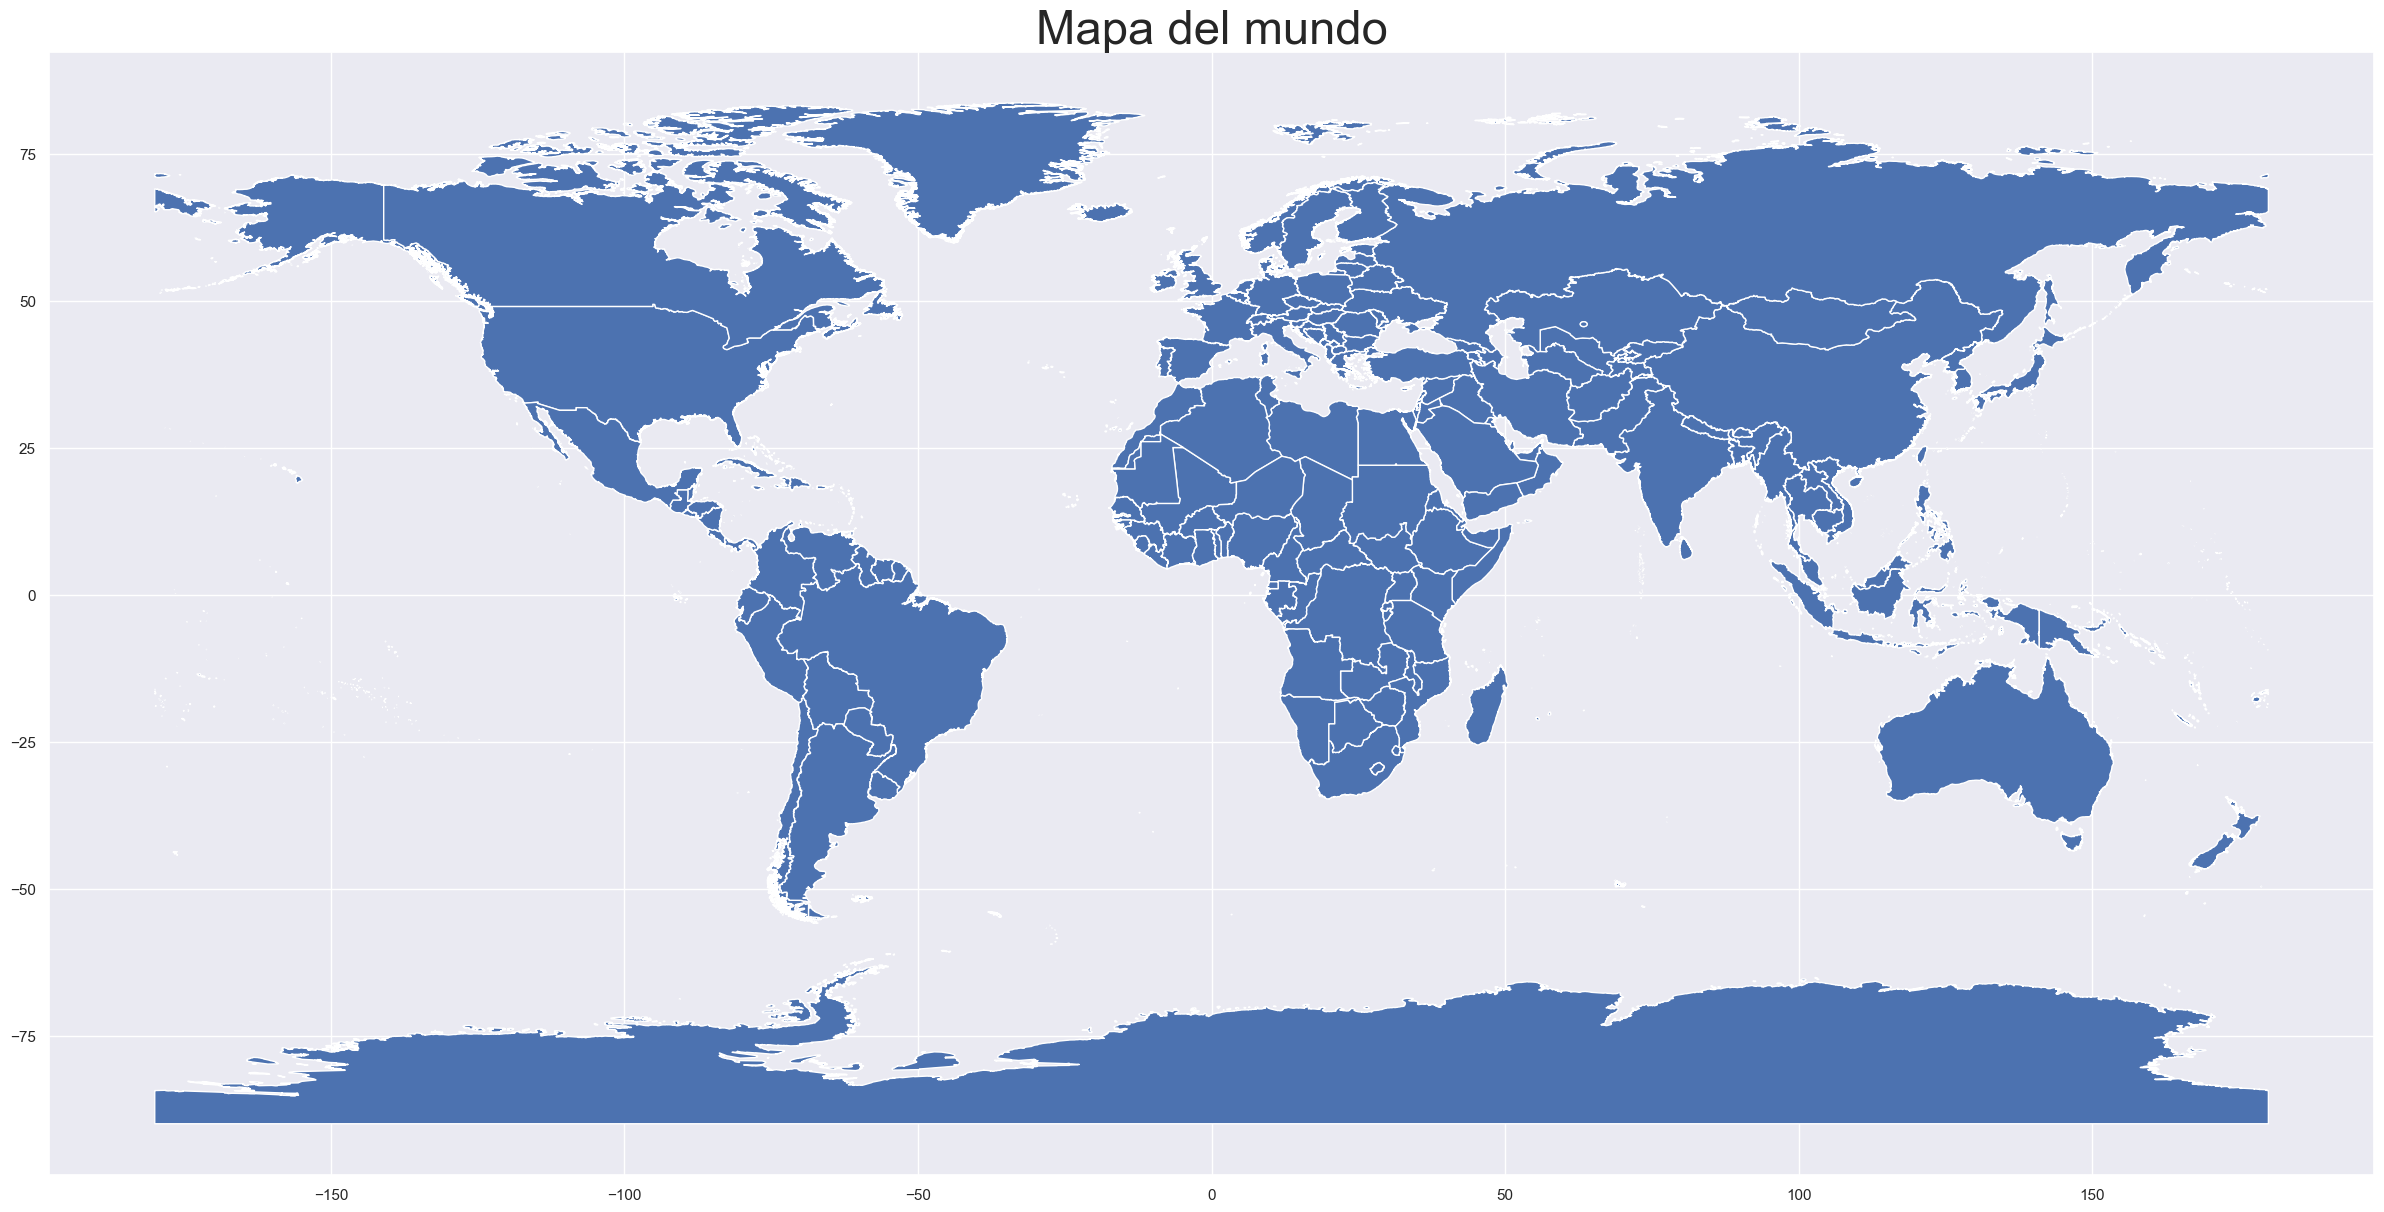

In [34]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(30,20))
countries.plot(ax=ax)
ax.set_title("Mapa del mundo", fontdict={'fontsize':34})

In [35]:

import geoplot as gplt
import geoplot.crs as gcrs
import mapclassify as mc
import textwrap

In [36]:
# Functions for plotting
def center_wrap(text, cwidth=32, **kw):
    '''Center Text (to be used in legend)'''
    lines = text
    #lines = textwrap.wrap(text, **kw)
    return "\n".join(line.center(cwidth) for line in lines)

def MyChloropleth(mydf=covid.loc[covid.date=='2020-02-24'], myfile='covid', myvar='total_cases',
                  mylegend='Casos COVID 19 2021 - 05 - 20',
                  k=5,
                  extent=[-180, -90, 180, 90],
                  bbox_to_anchor=(0.2, 0.5),
                  edgecolor='white', facecolor='lightgray',
                  scheme='FisherJenks',
                  save=True,
                  percent=False,
                  **kwargs):
    # Chloropleth
    # Color scheme
    if scheme=='EqualInterval':
        scheme = mc.EqualInterval(mydf[myvar], k=k)
    elif scheme=='Quantiles':
        scheme = mc.Quantiles(mydf[myvar], k=k)
    elif scheme=='BoxPlot':
        scheme = mc.BoxPlot(mydf[myvar], k=k)
    elif scheme=='FisherJenks':
        scheme = mc.FisherJenks(mydf[myvar], k=k)
    elif scheme=='FisherJenksSampled':
        scheme = mc.FisherJenksSampled(mydf[myvar], k=k)
    elif scheme=='HeadTailBreaks':
        scheme = mc.HeadTailBreaks(mydf[myvar], k=k)
    elif scheme=='JenksCaspall':
        scheme = mc.JenksCaspall(mydf[myvar], k=k)
    elif scheme=='JenksCaspallForced':
        scheme = mc.JenksCaspallForced(mydf[myvar], k=k)
    elif scheme=='JenksCaspallSampled':
        scheme = mc.JenksCaspallSampled(mydf[myvar], k=k)
    elif scheme=='KClassifiers':
        scheme = mc.KClassifiers(mydf[myvar], k=k)
    # Format legend
    upper_bounds = scheme.bins
    # get and format all bounds
    bounds = []
    for index, upper_bound in enumerate(upper_bounds):
        if index == 0:
            lower_bound = mydf[myvar].min()
        else:
            lower_bound = upper_bounds[index-1]
        # format the numerical legend here
        if percent:
            bound = f'{lower_bound:.0%} - {upper_bound:.0%}'
        else:
            bound = f'{float(lower_bound):,.0f} - {float(upper_bound):,.0f}'
        bounds.append(bound)
    legend_labels = bounds
    #Plot
    ax = gplt.choropleth(
        mydf, hue=myvar, projection=gcrs.PlateCarree(central_longitude=0.0, globe=None),
        edgecolor='white', linewidth=1,
        cmap='Reds', legend=True,
        scheme=scheme,
        legend_kwargs={'bbox_to_anchor': bbox_to_anchor,
                       'frameon': True,
                       'title':mylegend,
                       },
        legend_labels = legend_labels,
        figsize=(24, 16),
        rasterized=True,
    )
    gplt.polyplot(
        countries, projection=gcrs.PlateCarree(central_longitude=0.0, globe=None),
        edgecolor=edgecolor, facecolor=facecolor,
        ax=ax,
        rasterized=True,
        extent=extent,
    )
    if save:
        plt.savefig(pathgraphs + myfile + '_' + myvar +'.pdf', dpi=300, bbox_inches='tight')
        plt.savefig(pathgraphs + myfile + '_' + myvar +'.png', dpi=300, bbox_inches='tight')
    pass

In [37]:
covid.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


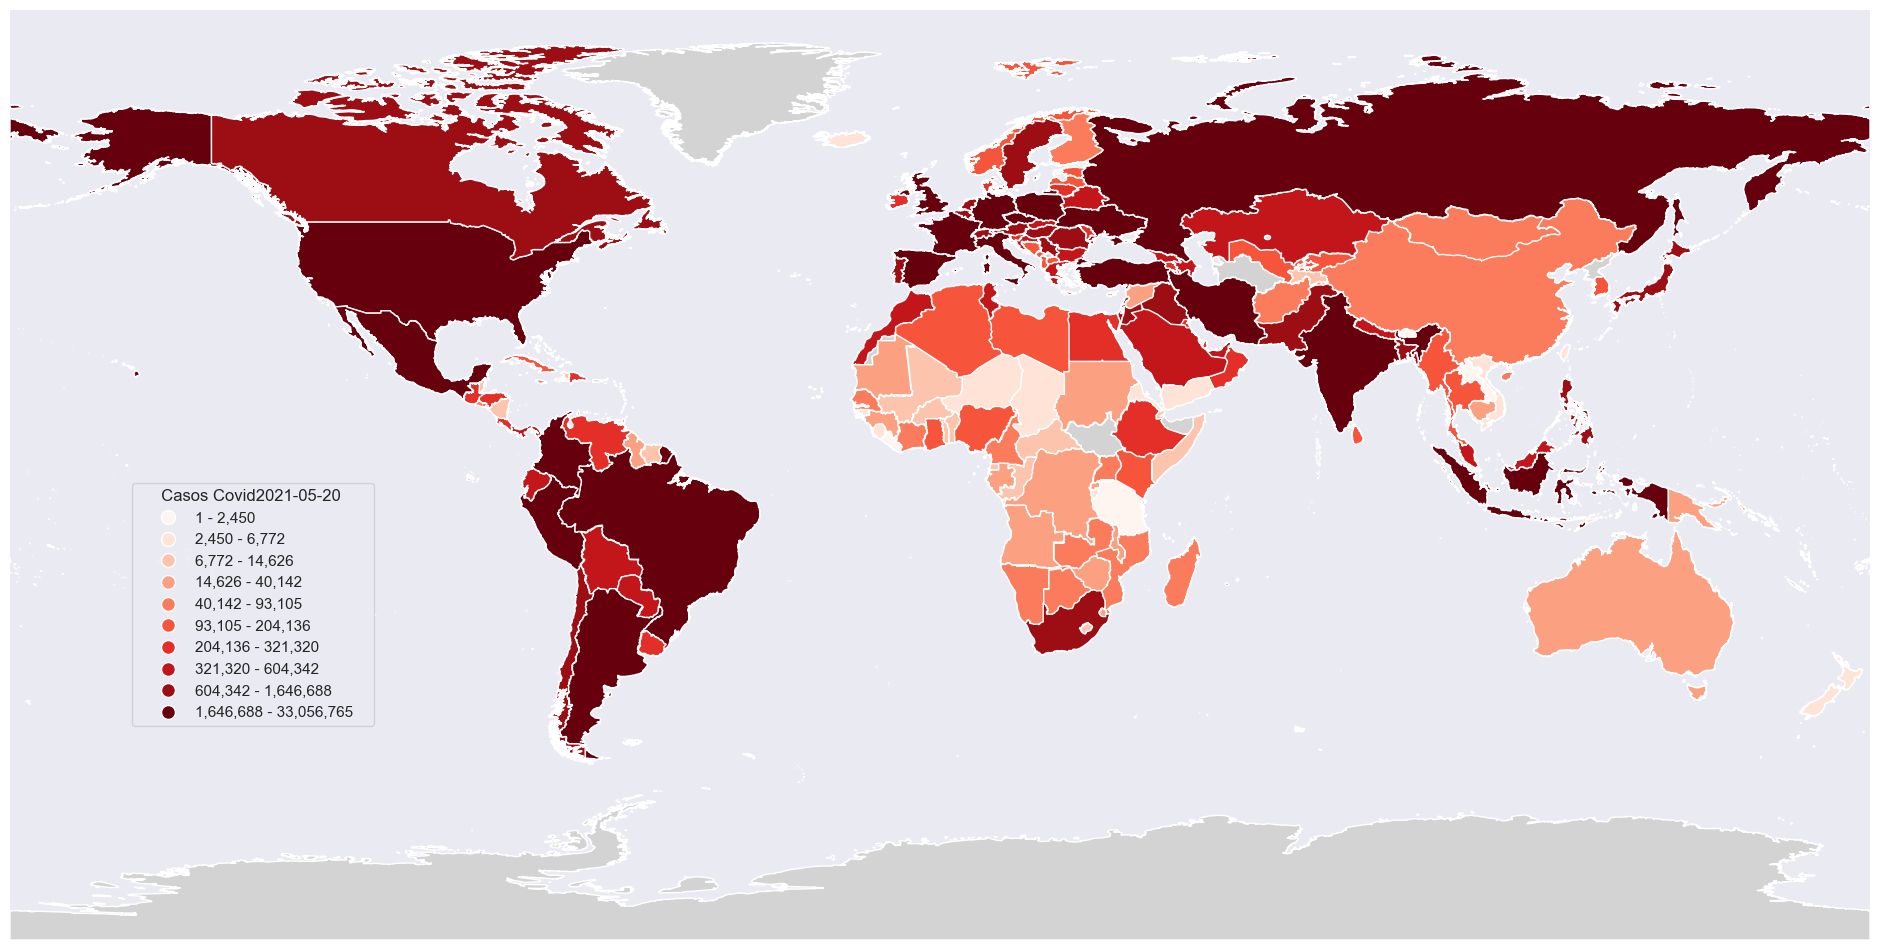

In [38]:
date = '2021-05-20'
covid1 = covid.loc[covid.date==date].reset_index(drop=True).copy()
covid1 = countries.merge(covid1, left_on='ADM0_A3', right_on='iso_code')
covid1 = covid1.dropna(subset=['total_cases'])
mylegend = center_wrap(["Casos Covid" + str(date)], cwidth=32, width=32)
MyChloropleth(mydf=covid1, myfile='owid-covid-data' + str(date), myvar='total_cases', mylegend=mylegend, scheme='Quantiles', k=10, save=False)


## 2. Mapa de Colombia - Velocidad de Internet Promedio por Departamentos (2021)

In [39]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline


In [98]:

inter = pd.read_excel(pathout + 'internetdpto.xlsx')
inter.sample(5)

/Users/Ingridt/opt/anaconda3/envs/GeoPython38env/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,COD,DEPARTAMENTO,VELOCIDAD_DESCARGA
15,17,CALDAS,8.47
32,97,VAUPES,0.20
31,94,GUANIA,0.20
25,0,COLOMBIA,5.60
29,95,GUAVIARE,3.40


In [91]:
inter.COD = inter.COD.astype('float64')

In [92]:
depto = gpd.read_file(pathout + 'departamentos.shp')

depto.sample(5)

,ID_ESPACIA,AREA_OFICI,NOMBRE_DPT,geometry
10,41,19890.0,HUILA,"POLYGON ((-74.51814 3.82550, -74.51267 3.82439..."
32,8,3388.0,ATLANTICO,"POLYGON ((-74.83155 11.05222, -74.82395 11.046..."
14,52,33268.0,NARIÑO,"POLYGON ((-78.14140 2.67691, -78.14140 2.67202..."
15,54,21658.0,NORTE DE SANTANDER,"POLYGON ((-73.00339 9.28749, -73.00328 9.28744..."
27,94,72238.0,GUAINIA,"POLYGON ((-67.67562 3.90989, -67.67357 3.90672..."


In [93]:
depto.columns

Index(['ID_ESPACIA', 'AREA_OFICI', 'NOMBRE_DPT', 'geometry'], dtype='object')

In [94]:
depto.ID_ESPACIA = depto.ID_ESPACIA.astype('float64')

In [95]:
mapadpt = pd.merge(depto,inter,how='left', left_on ='ID_ESPACIA', right_on = 'COD')

mapadpt.columns

Index(['ID_ESPACIA', 'AREA_OFICI', 'NOMBRE_DPT', 'geometry', 'COD',
       'DEPARTAMENTO', 'VELOCIDAD_DESCARGA'],
      dtype='object')

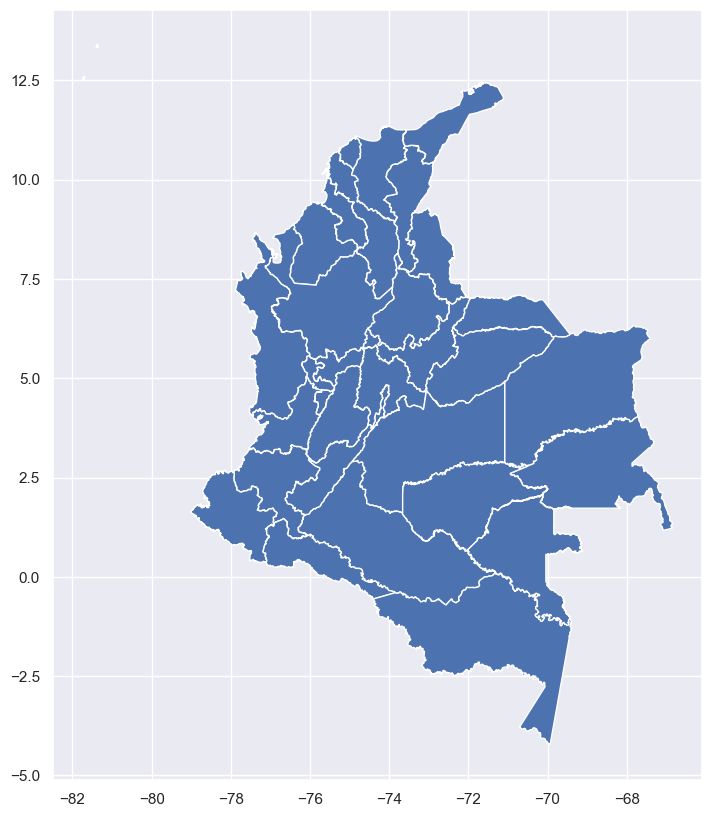

In [96]:
depto.plot(figsize=(20,10))
plt.show()

<AxesSubplot:title={'center':'Velocidad de descarga promedio por departamento'}>

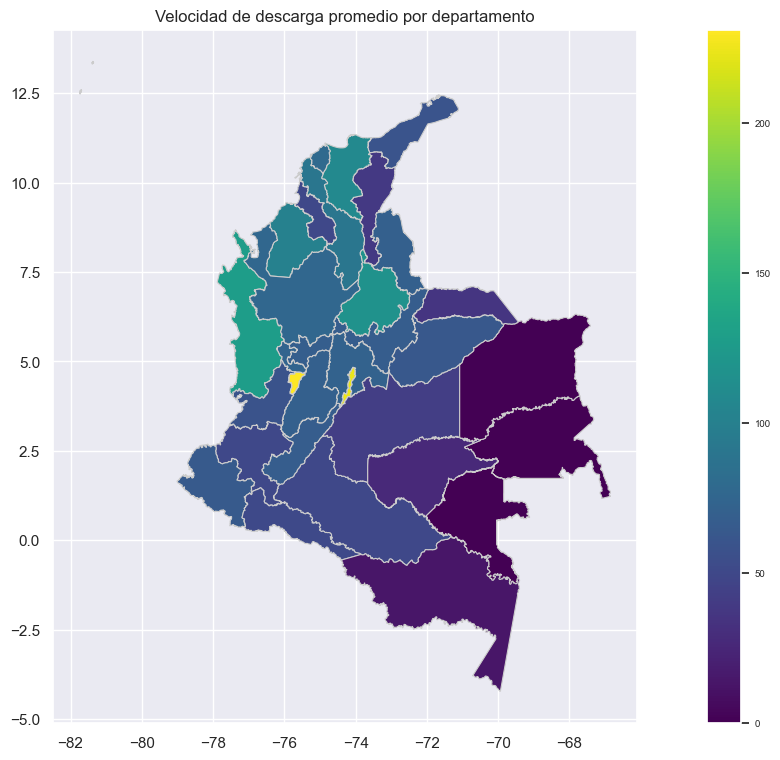

In [102]:
fig, ax = plt.subplots(1, figsize=(18, 9))
color = 'viridis'
vmin, vmax = 0, 231
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=7)


ax.set_title('Velocidad de descarga promedio por departamento') 

mapadpt.plot('VELOCIDAD_DESCARGA', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))